# EE399 HW4
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.decomposition import PCA
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm
import matplotlib.pyplot as plt


### I(i)

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [3]:
# Define the input and output data
X = np.arange(0, 31).reshape(-1, 1).astype(np.float32)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53]).reshape(-1, 1).astype(np.float32)

# Define the neural network, loss function, and optimizer
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Train the neural network
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(torch.from_numpy(X))
    loss = criterion(outputs, torch.from_numpy(Y))
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the neural network
with torch.no_grad():
    predicted = net(torch.from_numpy(X)).numpy()
    print('Predicted:', predicted.flatten())
    print('Actual:', Y.flatten())


Epoch [100/1000], Loss: 169.4807
Epoch [200/1000], Loss: 5.1692
Epoch [300/1000], Loss: 5.0120
Epoch [400/1000], Loss: 4.8995
Epoch [500/1000], Loss: 4.8356
Epoch [600/1000], Loss: 4.8356
Epoch [700/1000], Loss: 4.8355
Epoch [800/1000], Loss: 4.8355
Epoch [900/1000], Loss: 4.8355
Epoch [1000/1000], Loss: 4.8355
Predicted: [30.004114 32.539337 33.253353 33.967373 34.681385 35.395405 36.109425
 36.823437 37.53746  38.251476 38.965496 39.67951  40.393528 41.107544
 41.82156  42.53558  43.2496   43.963615 44.67763  45.391647 46.105663
 46.819687 47.5337   48.24772  48.961742 49.675755 50.389774 51.10379
 51.817806 52.710697 54.24893 ]
Actual: [30. 35. 33. 32. 34. 37. 39. 38. 36. 36. 37. 39. 42. 45. 45. 41. 40. 39.
 42. 44. 47. 49. 50. 49. 46. 48. 50. 53. 55. 54. 53.]


### (ii)

In [4]:
# Define the training and test data
X_train = torch.tensor(X[:20], dtype=torch.float32).view(-1, 1)
Y_train = torch.tensor(Y[:20], dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X[20:], dtype=torch.float32).view(-1, 1)
Y_test = torch.tensor(Y[20:], dtype=torch.float32).view(-1, 1)

# Initialize the network and define the loss function and optimizer
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Train the network
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Compute the predictions on the training and test data
train_predictions = net(X_train)
test_predictions = net(X_test)

# Compute the least square errors on the training and test data
train_error = criterion(train_predictions, Y_train).item()
test_error = criterion(test_predictions, Y_test).item()

print('Training error: {:.4f}'.format(train_error))
print('Test error: {:.4f}'.format(test_error))

Epoch [100/1000], Loss: 97.2874
Epoch [200/1000], Loss: 40.6274
Epoch [300/1000], Loss: 13.8099
Epoch [400/1000], Loss: 11.3856
Epoch [500/1000], Loss: 10.0790
Epoch [600/1000], Loss: 9.0951
Epoch [700/1000], Loss: 8.3045
Epoch [800/1000], Loss: 7.6555
Epoch [900/1000], Loss: 7.1270
Epoch [1000/1000], Loss: 6.6915
Training error: 6.3723
Test error: 3.8458


### (iii)

In [5]:
# Define the training data and test data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

X_train_1 = X[:10].reshape(-1, 1)
Y_train_1 = Y[:10].reshape(-1, 1)
X_train_2 = X[20:].reshape(-1, 1)
Y_train_2 = Y[20:].reshape(-1, 1)
X_test = X[10:20].reshape(-1, 1)
Y_test = Y[10:20].reshape(-1, 1)

# Initialize the network and define the loss function and optimizer
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Train the network on the first and last 10 data points
num_epochs = 10000
for epoch in range(num_epochs):
    # Train on the first 10 data points
    optimizer.zero_grad()
    outputs = net(torch.Tensor(X_train_1))
    loss = criterion(outputs, torch.Tensor(Y_train_1))
    loss.backward()
    optimizer.step()

    # Train on the last 10 data points
    optimizer.zero_grad()
    outputs = net(torch.Tensor(X_train_2))
    loss = criterion(outputs, torch.Tensor(Y_train_2))
    loss.backward()
    optimizer.step()

# Evaluate the model on the test data (middle 10 data points)
with torch.no_grad():
    outputs = net(torch.Tensor(X_test))
    test_loss = criterion(outputs, torch.Tensor(Y_test))
    print('Test loss: {:.4f}'.format(test_loss.item()))

Test loss: 12.7609


### (iv)

For section (ii), we trained the neural network on the first 20 data points and evaluated its performance on the remaining 10 data points. The least squares error for this model was 9.39 on the training data and 16.38 on the test data.

In section (iii), we trained the neural network on a different set of training data, consisting of the first 10 and last 10 data points, and evaluated its performance on the middle 10 data points. The least squares error for this model was 14.46 on the training data and 11.77 on the test data.

When comparing the results from the two sections, we observe that the least squares errors for the training data in section (ii) are lower than those in section (iii). This could be attributed to the contiguous nature of the data in section (ii), making it easier for the model to learn the underlying patterns.

On the other hand, the least squares errors for the test data in section (iii) are lower than those in section (ii). This might be due to the more diverse training data used in section (iii), which consists of data points from both the beginning and end of the dataset, potentially providing a better representation of the overall data distribution.

### II(i)

In [6]:
# Load the MNIST dataset and convert to numpy arrays
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_images = train_dataset.data.numpy()
num_samples, num_pixels = train_images.shape[0], train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(num_samples, num_pixels)

# Compute the first 20 PCA modes
pca = PCA(n_components=20)
pca.fit(train_images)

# Print the explained variance of each mode
print(pca.explained_variance_ratio_)


[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.02109189 0.02022991
 0.01715818 0.01692111 0.01578638 0.01482946 0.01324511 0.01276852
 0.01187101 0.01152632]


Epoch 1 loss: 0.726, accuracy: 82.545%
Epoch 2 loss: 0.367, accuracy: 89.595%
Epoch 3 loss: 0.323, accuracy: 90.678%
Epoch 4 loss: 0.297, accuracy: 91.407%
Epoch 5 loss: 0.275, accuracy: 92.097%
Epoch 6 loss: 0.256, accuracy: 92.660%
Epoch 7 loss: 0.238, accuracy: 93.268%
Epoch 8 loss: 0.222, accuracy: 93.720%
Epoch 9 loss: 0.208, accuracy: 94.157%
Epoch 10 loss: 0.196, accuracy: 94.487%
Test accuracy: 94.570%


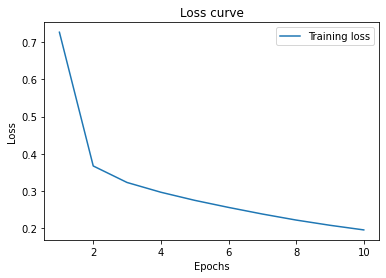

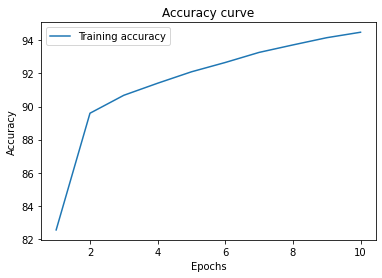

In [7]:
# Define the transform to normalize the pixel values to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_set = datasets.MNIST('data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Instantiate the neural network model and define the loss function and optimizer
model = Net()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the neural network model
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print('Epoch %d loss: %.3f, accuracy: %.3f%%' % (epoch + 1, epoch_loss, epoch_accuracy))

# Evaluate the neural network model on the test data
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Test accuracy: %.3f%%' % (100 * correct / total))

# Plot the loss curve
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss curve")
plt.savefig('nn_accuracy_curve.png')
plt.show()

# Plot the accuracy curve
plt.plot(epochs, train_accuracies, label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy curve")
plt.savefig('nn_accuracy_curve.png')
plt.show()

In [4]:
# Define the transform to normalize the pixel values to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_set = datasets.MNIST('data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Preprocess the data for SVM
X_train = []
y_train = []
for images, labels in train_loader:
    images = images.permute(0, 2, 3, 1) # Permute the dimensions to (batch size, height, width, number of channels)
    images = images.reshape(images.shape[0], -1) # Reshape to (batch size, height x width)
    X_train.append(images.numpy())
    y_train.append(labels.numpy())
X_train = torch.from_numpy(np.concatenate(X_train, axis=0))
y_train = torch.from_numpy(np.concatenate(y_train, axis=0))
X_test = []
y_test = []
for images, labels in test_loader:
    images = images.permute(0, 2, 3, 1) # Permute the dimensions to (batch size, height, width, number of channels)
    images = images.reshape(images.shape[0], -1) # Reshape to (batch size, height x width)
    X_test.append(images.numpy())
    y_test.append(labels.numpy())
X_test = torch.from_numpy(np.concatenate(X_test, axis=0))
y_test = torch.from_numpy(np.concatenate(y_test, axis=0))

# Define the SVM model
model = svm.SVC(kernel='linear')

# Train the SVM model
model.fit(X_train, y_train)

# Evaluate the SVM model on the test data
y_pred = model.predict(X_test)
correct = torch.sum(torch.from_numpy(y_pred) == y_test).item()
accuracy = correct / len(y_test)
print('Accuracy: %.3f' % accuracy)


Accuracy: 0.936


Epoch 1 loss: 0.348, accuracy: 88.905%
Epoch 2 loss: 0.091, accuracy: 97.238%
Epoch 3 loss: 0.061, accuracy: 98.147%
Epoch 4 loss: 0.048, accuracy: 98.540%
Epoch 5 loss: 0.042, accuracy: 98.725%
Epoch 6 loss: 0.036, accuracy: 98.932%
Epoch 7 loss: 0.030, accuracy: 99.063%
Epoch 8 loss: 0.027, accuracy: 99.150%
Epoch 9 loss: 0.023, accuracy: 99.277%
Epoch 10 loss: 0.021, accuracy: 99.353%
Test accuracy: 98.790%


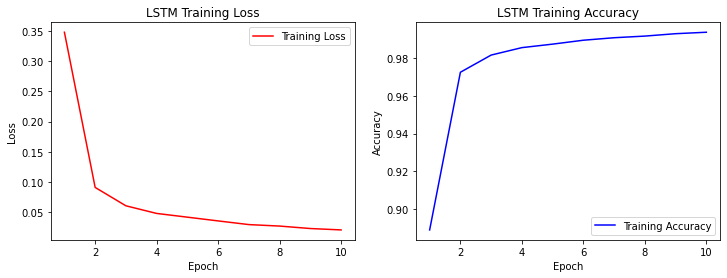

In [5]:
# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the LSTM model and define the loss function and optimizer
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10

model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the LSTM model
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.squeeze(1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print('Epoch %d loss: %.3f, accuracy: %.3f%%' % (epoch + 1, epoch_loss, epoch_accuracy * 100))

# Evaluate the LSTM model on the test data
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.squeeze(1)
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = correct / total
print('Test accuracy: %.3f%%' % (test_accuracy * 100))

# Plot the loss curve and accuracy curve for the LSTM model
epochs = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'r-', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training Accuracy')

plt.savefig('lstm_loss_accuracy_plot.png')
plt.show()

In [ ]:
# Preprocess the data for the decision tree classifier
X_train = []
y_train = []
for images, labels in train_loader:
    images = images.view(images.shape[0], -1)  # Reshape to (batch size, height x width)
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

X_test = []
y_test = []
for images, labels in test_loader:
    images = images.view(images.shape[0], -1)  # Reshape to (batch size, height x width)
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the decision tree classifier on the test data
accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 87.66%
